# Project

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy   import   stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics

### Example: Multivariate Linear Regression

#### You will analyze data on colleges from a dataset maintained by the Carnegie Mellon University from before 1995.

## Variables
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

### Let acceptance to college= Accept (y). Is acceptance to college related to the linear combination of Top25perc (x1) and Outstate(x2), and Apps (x3)?

In [2]:
# read the data set 
df = pd.read_csv('college.csv')

In [3]:
# display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Collegename  777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [4]:
# display head of data
df.head()

,Collegename,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<AxesSubplot:>

Collegename    0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

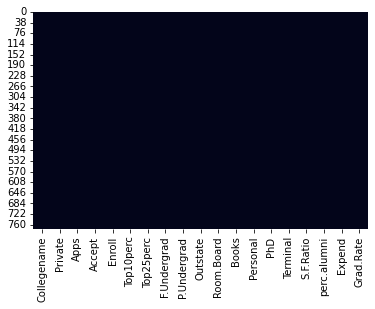

In [9]:
# check for missing data
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

<AxesSubplot:xlabel='Top25perc', ylabel='Accept'>

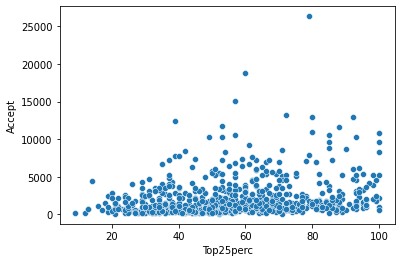

In [10]:
# check accept & Top25perc linear with a graph?
sns.scatterplot(x="Top25perc",y="Accept",data=df)
plt.show()

<AxesSubplot:xlabel='Outstate', ylabel='Accept'>

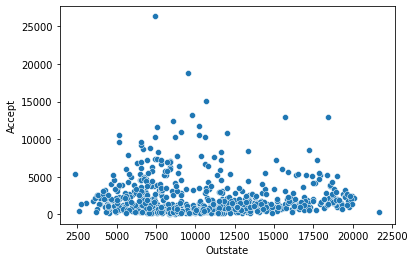

In [11]:
# check accept & Outstate linear with a graph?
sns.scatterplot(x="Outstate",y="Accept",data=df)
plt.show()

<AxesSubplot:xlabel='Apps', ylabel='Accept'>

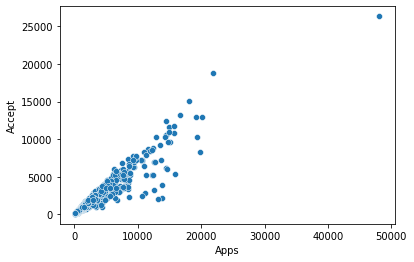

In [12]:
# check accept & Apps linear with a graph?
sns.scatterplot(x="Apps",y="Accept",data=df)
plt.show()

In [16]:
# save the x values in a data set
# check if the predictors are correlated with each other? 
# Check only the predictors, do not do the correlation for the entire dataset
dfnew = df[['Top25perc', 'Outstate', 'Apps']]
dfnew.head()
corrmat = dfnew.corr()
corrmat

,Top25perc,Outstate,Apps
0,52,7440,1660
1,29,12280,2186
2,50,11250,1428
3,89,12960,417
4,44,7560,193


,Top25perc,Outstate,Apps
Top25perc,1.000000,0.489394,0.351640
Outstate,0.489394,1.000000,0.050159
Apps,0.351640,0.050159,1.000000


[Text(0.5, 1.0, 'Accept box plot'), Text(0.5, 0, 'Aceept')]

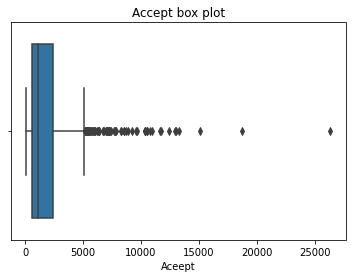

In [17]:
# create a boxplot of the y variable
ax = sns.boxplot(x='Accept', data=df)
ax.set(title='Accept box plot',xlabel='Aceept')


In [19]:
#  Create a Linear Regression model & print the model summary
model = ols("Accept ~ Top25perc+Outstate+Apps", df).fit()
# regression model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Accept   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2299.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:27:36   Log-Likelihood:                -6274.4
No. Observations:                 777   AIC:                         1.256e+04
Df Residuals:                     773   BIC:                         1.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    933.4874     92.318     10.112      0.0

In [20]:
# is the model significant?
# Analysis:Prob (F-statistic) =  0.00 < alpha - 0.05; so the model is significant

In [22]:
# Is the relationship between x & y significant? We will analyze slope of regression line to determine this.

# Analysis:
# the slope b1 should not be equal to zero
# we take a look at the p values.smaller p values indicate stronger relationships between y and x

model.pvalues

# Top25perc, Outstate and Apps p values are < alpha, which gives evidence that the slope of the regression line is not zero.
# therefore the relationship between x & y is significant

Intercept    1.169300e-22
Top25perc    9.473979e-08
Outstate     5.010093e-03
Apps         0.000000e+00
dtype: float64

In [23]:
# check mean of model residuals near zero
np.mean(model.resid)

1.367168354788649e-12

In [24]:
# write the regression model using your results
# Our model: accept  = 933.4874 + -9.4196*Apps

In [25]:
# How good is the prediction? Hint calculate the RMSE: root mean squared
target = df.Accept
ypred = model.predict()
yactual = target

rmse = np.sqrt( metrics.mean_squared_error( yactual , ypred ))
print('RMSE =', rmse)
# check rmse against range of data
myrange = np.max(target) - np.min(target)
print('range of Accepts = ',round(myrange,2))


RMSE = 777.5619648010062
range of Accepts =  26258


In [26]:
# What percent of the variation in y is determined by the x value?
# Adjusted rsquared 0.899, indicating that 90% of the variation in y is explained by x

# End of Project